In [1]:
# Доверительные интервалы для параметров нормального закона.
# n: 1000; a: 6.4; sigma: 10;

# Лабораторная работа № 4 по Математической Статистике;
# Вариант 13;
# Выполнил: Фомин Олег Витальевич;
# Группа: ФН11-53Б;

In [2]:
# Построить доверительные интервалы:
# На уровнях доверия 1 − 𝛼: а) 0,9; б) 0,95; в) 0,99;

In [23]:
# Подключение библиотек и модулей:
import numpy as np
import pandas as pd
from scipy.stats import t
import scipy.stats as stats
from scipy.stats import chi2
import matplotlib.pyplot as plt


Минимальный член вариационного ряда: -30.70679
Максимальный член вариационного ряда: 38.06557
Размах выборки: 68.77236
Число интервалов: 10
Ширина интервала: 6.87724




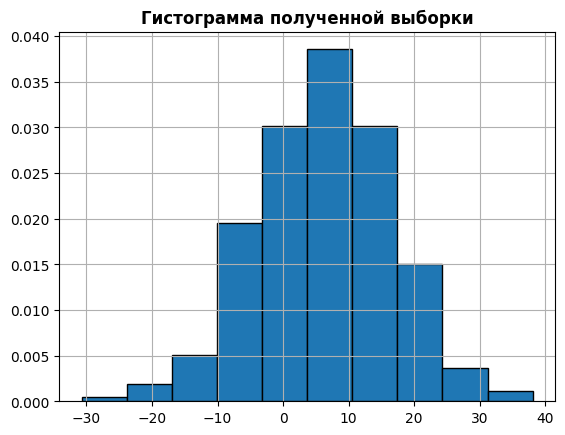

In [24]:
# С помощью встроенного датчика нормального распределения сгенерируйте
# нормально распределенный массив 𝑋 объема 𝑛 с параметрами 𝑎 и 𝜎 и выведите
# его на печать в виде матрицы подходящего размера.

# Начальный посев данных:
np.random.seed(12)

# Генерация выборки:
data =  np.random.normal(loc=6.4, scale=10, size=(1000))
#print("Выборка из нормального распределения размером n = 1000:\n\n", np.sort(data))

mini = round(np.min(data), 5)
maxi = round(np.max(data), 5)
print("\nМинимальный член вариационного ряда:", mini)
print("Максимальный член вариационного ряда:", maxi)
w = maxi - mini
print("Размах выборки:", w)
l = int(1 + np.log2(len(data)))
h = round(w / l, 5)
print("Число интервалов:", l)
print("Ширина интервала:", h)
print('\n')

# График:
plt.hist(data,
         bins = l,
         density=True,
         edgecolor="black")

plt.title("Гистограмма полученной выборки", fontweight='bold')
plt.grid()
plt.show()

In [25]:
print("Выборочное среднее:", np.mean(data))
print("Выборочная исправленная дисперсия:", np.var(data, ddof=1))
print("Среднеквадратическое отклонение:", np.var(data, ddof=1) ** (1/2))

Выборочное среднее: 6.283797731698882
Выборочная исправленная дисперсия: 105.40398097406081
Среднеквадратическое отклонение: 10.266644095032262


*Построение доверительных интервалов* ☕


In [28]:
# По полученной выборке 𝑋 постройте следующие доверительные интервалы:
# 1. (𝑎1, 𝑎2) – для математического ожидания 𝑎 в предположении, что дисперсия 𝜎^2 неизвестна;

# Начальный посев данных:
np.random.seed(12)

# Построение выборки из распределения Стьюдента:
x = sorted(t.rvs(df=len(data) - 1, loc=6.4, scale=10, size=1000))

# Квантили уровней:
q_95 = pd.DataFrame(x).quantile(0.95)[0]
q_975 = pd.DataFrame(x).quantile(0.975)[0]
q_995 = pd.DataFrame(x).quantile(0.995)[0]

print("\nДоверительные интервалы для мат. ожидания различных уровней статистической значимости:")
# Вычисление доверительного интервала для alpha = 0.1
def alpha_01_mo(data: list):

    left = np.mean(data) - (np.var(data, ddof=1) ** (1/2) * q_95) / (len(data) ** 1/2)
    right = np.mean(data) + (np.var(data, ddof=1) ** (1/2) * q_95) / (len(data) ** 1/2)

    return [left,  right]

print("\nДоверительный интервал для alpha = 0.1:", alpha_01_mo(data))

# Вычисление доверительного интервала для alpha = 0.05
def alpha_005_mo(data: list):

    left = np.mean(data) - (np.var(data, ddof=1) ** (1/2) * q_975) / (len(data) ** 1/2)
    right = np.mean(data) + (np.var(data, ddof=1) ** (1/2) * q_975) / (len(data) ** 1/2)

    return [left,  right]

print("\nДоверительный интервал для alpha = 0.05:", alpha_005_mo(data))

# Вычисление доверительного интервала для alpha = 0.01
def alpha_001_mo(data: list):

    left = np.mean(data) - ((np.var(data, ddof=1) ** (1/2) * q_995) / (len(data) ** 1/2))
    right = np.mean(data) + ((np.var(data, ddof=1) ** (1/2) * q_995) / (len(data) ** 1/2))

    return [left, right]

print("\nДоверительный интервал для alpha = 0.01:", alpha_001_mo(data))


Доверительные интервалы для мат. ожидания различных уровней статистической значимости:

Доверительный интервал для alpha = 0.1: [5.821155081093615, 6.746440382304149]

Доверительный интервал для alpha = 0.05: [5.754907385629292, 6.812688077768471]

Доверительный интервал для alpha = 0.01: [5.67014243233332, 6.897453031064444]


In [29]:
# По полученной выборке 𝑋 постройте следующие доверительные интервалы:
# 2. (𝜎1, 𝜎2) – для среднего квадратического отклонения 𝜎 в предположении, что математическое ожидание 𝑎 неизвестно

# Начальный посев данных:
np.random.seed(12)

# Построение выборки из распрделения Хи_квадрат с (n - 1) степенями свободы:
x = sorted(chi2.rvs(df=len(data) - 1, size=len(data)))

# left:
q_05 = pd.DataFrame(x).quantile(.05)[0]
q_025 = pd.DataFrame(x).quantile(.025)[0]
q_005 = pd.DataFrame(x).quantile(.005)[0]

# right:
q_95 = pd.DataFrame(x).quantile(.95)[0]
q_975 = pd.DataFrame(x).quantile(.975)[0]
q_995 = pd.DataFrame(x).quantile(.995)[0]

# Вычисление доверительного интервала для alpha = 0.1
def alpha_01_std(data: list):

    left = (((len(data) - 1) * np.var(data, ddof=1)) / (q_95)) ** (1/2)
    right = (((len(data) - 1) * np.var(data, ddof=1)) / (q_05)) ** (1/2)

    return [left,  right]

print("\nДоверительный интервал для alpha = 0.1:", alpha_01_std(data))

# Вычисление доверительного интервала для alpha = 0.05
def alpha_005_std(data: list):

    left = (((len(data) - 1) * np.var(data, ddof=1)) / (q_975)) ** (1/2)
    right = (((len(data) - 1) * np.var(data, ddof=1)) / (q_025)) ** (1/2)

    return [left,  right]

print("\nДоверительный интервал для alpha = 0.05:", alpha_005_std(data))

# Вычисление доверительного интервала для alpha = 0.01
def alpha_001_std(data: list):

    left = (((len(data) - 1) * np.var(data, ddof=1)) / (q_995)) ** (1/2)
    right = (((len(data) - 1) * np.var(data, ddof=1)) / (q_005)) ** (1/2)

    return [left, right]

print("\nДоверительный интервал для alpha = 0.01:", alpha_001_std(data))


Доверительный интервал для alpha = 0.1: [9.904114367356891, 10.641853958469222]

Доверительный интервал для alpha = 0.05: [9.84120902954158, 10.720138753884966]

Доверительный интервал для alpha = 0.01: [9.69201973562553, 10.898254980255716]


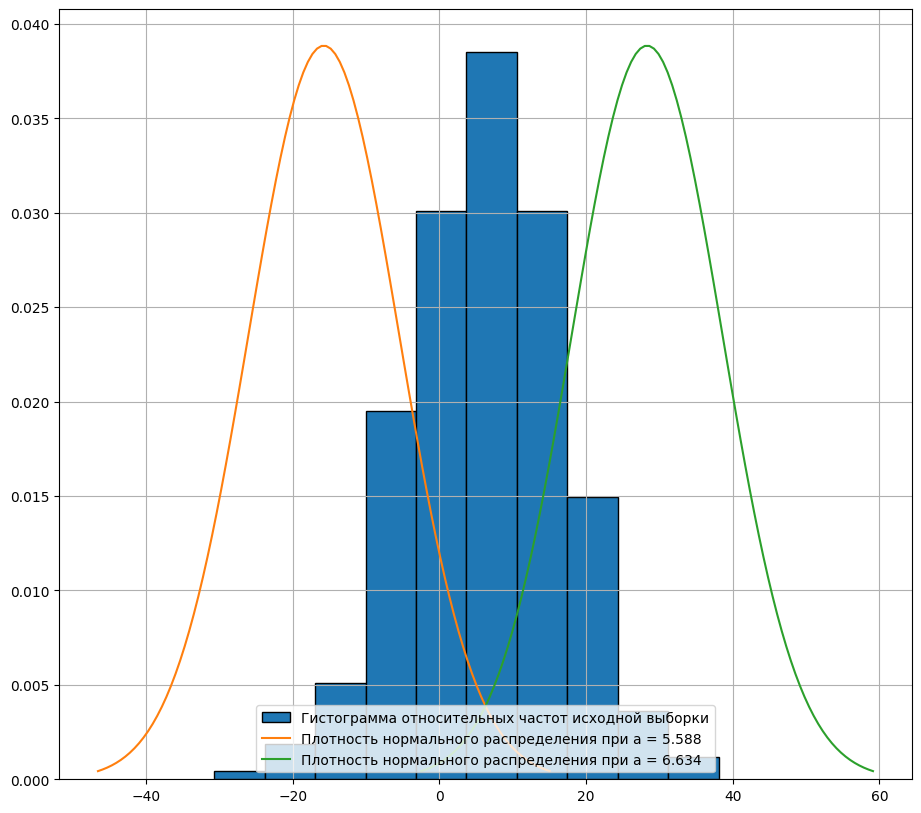

In [30]:
# Дайте графическую иллюстрацию, изобразив на одном рисунке:
#  - гистограмму относительных частот для исследуемой выборки;
#  - функции плотности нормального распределения с математическими ожиданиями 𝑎1 и 𝑎2 и выборочным значением
#    среднего квадратического отклонения 𝜎 (для одного из трех заданных уровней доверия 1 − 𝛼).

# Сформулируйте выводы.

# Построим функции плотности норм. распределения для уровня доверия: 1 - alpha = 0.9; alpha = 0.1
a1 = alpha_01_mo(data)[0]
a2 = alpha_01_mo(data)[1]

# Настройка графика и исходные данные:
plt.figure(figsize=(11, 10))
plt.grid()

# Гистограмма:
plt.hist(data,
         bins = l,
         density=True,
         edgecolor="black",
         label='Гистограмма относительных частот исходной выборки')

# Функция плотности нормального распрделения для мат. ожидания = a1:
x = np.linspace(a1 - 3 * np.var(data, ddof=1) ** (1/2),
                a1 + 3 * np.var(data, ddof=1) ** (1/2),
                100)
plt.plot(x,
         stats.norm.pdf(x, a1, np.var(data, ddof=1) ** (1/2)),
         label = 'Плотность нормального распределения при a = 5.588')

# Функция плотности нормального распрделения для мат. ожидания = a2:
x = np.linspace(a2 - 3 * np.var(data, ddof=1) ** (1/2),
                a2 + 3 * np.var(data, ddof=1) ** (1/2),
                100)
plt.plot(x,
         stats.norm.pdf(x, a2, np.var(data, ddof=1) ** (1/2)),
         label = 'Плотность нормального распределения при a = 6.634')

plt.legend(loc='lower center')
plt.show()